<a href="https://colab.research.google.com/github/omkarwazulkar/ComputerVisionProjects/blob/main/Detecting_Faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opencv-python

In [2]:
import cv2
print(cv2.__version__)

4.1.2


In [5]:
# example of face detection with opencv cascade classifier
from cv2 import imread
from cv2 import CascadeClassifier

# Load Photograph
pixels = imread('/content/drive/MyDrive/Dataset/Datasets/FaceDetection/students.jpeg')

classifier = CascadeClassifier('/content/drive/MyDrive/Dataset/Datasets/FaceDetection/haarcascade_frontalface_default.xml')

# perform face detection
bboxes = classifier.detectMultiScale(pixels)

# print bounding box for each detected face
for box in bboxes:
  print(box)

[173  74 108 108]
[363 104  97  97]


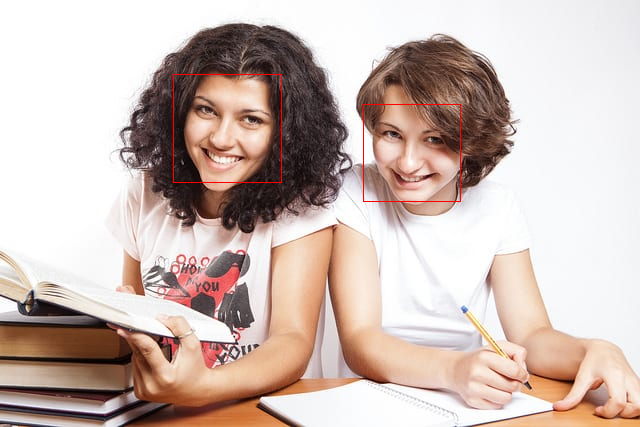

In [11]:
# plot photo with detected faces using opencv cascade classifier
from cv2 import imread
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle
from google.colab.patches import cv2_imshow

# Loading Photograph
pixels = imread('/content/drive/MyDrive/Dataset/Datasets/FaceDetection/students.jpeg')

# Load Model
classifier = CascadeClassifier('/content/drive/MyDrive/Dataset/Datasets/FaceDetection/haarcascade_frontalface_default.xml')

# Face Detection
bboxes = classifier.detectMultiScale(pixels)

# Bounding Box for Each Face
for box in bboxes:
  x, y, width, height = box
  x2, y2 = x + width, y + height
  rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)
cv2_imshow(pixels)

waitKey(0)
destroyAllWindows()

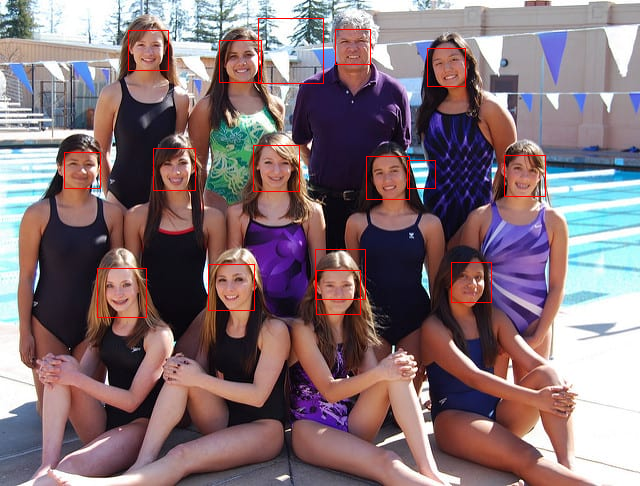

In [15]:
pixels = imread('/content/drive/MyDrive/Dataset/Datasets/FaceDetection/swimmers.jpeg')
bboxes = classifier.detectMultiScale(pixels, 1.1, 3)

for box in bboxes:
  x, y, width, height = box
  x2, y2 = x + width, y + height
  rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)
cv2_imshow(pixels)

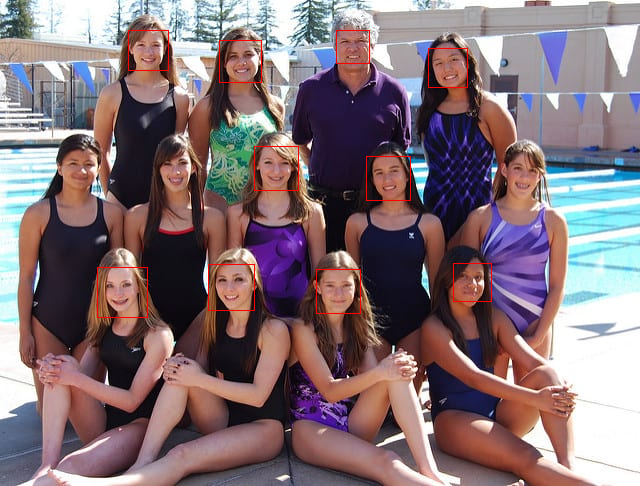

In [16]:
pixels = imread('/content/drive/MyDrive/Dataset/Datasets/FaceDetection/swimmers.jpeg')
bboxes = classifier.detectMultiScale(pixels, 1.05, 8)

for box in bboxes:
  x, y, width, height = box
  x2, y2 = x + width, y + height
  rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)
cv2_imshow(pixels)

In [17]:
pip install mtcnn

     |████████████████████████████████| 2.3 MB 5.2 MB/s 


In [18]:
pip show mtcnn

Name: mtcnn
Version: 0.1.1
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: opencv-python, keras
Required-by: 


In [19]:
import mtcnn
print(mtcnn.__version__)

0.1.0


In [20]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN

# Load Image

filename = '/content/drive/MyDrive/Dataset/Datasets/FaceDetection/students.jpeg'
pixels = pyplot.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixels)
for face in faces:
  print(face)

{'box': [373, 83, 100, 129], 'confidence': 0.9998095631599426, 'keypoints': {'left_eye': (392, 132), 'right_eye': (436, 139), 'nose': (403, 171), 'mouth_left': (390, 171), 'mouth_right': (438, 177)}}
{'box': [185, 68, 91, 118], 'confidence': 0.9993304014205933, 'keypoints': {'left_eye': (208, 110), 'right_eye': (252, 119), 'nose': (220, 143), 'mouth_left': (200, 148), 'mouth_right': (245, 159)}}


In [21]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

In [23]:
# Image with Objects
def draw_image_with_boxes(filename, result_list):

  # Load Image
  data = pyplot.imread(filename)

  # Plot Image
  pyplot.imshow(data)

  # Plot Box
  ax = pyplot.gca()
  for result in result_list:
    x, y, width, height = result['box']
    rect = Rectangle((x, y), width, height, fill=False, color='red')
    ax.add_patch(rect)
  pyplot.show()

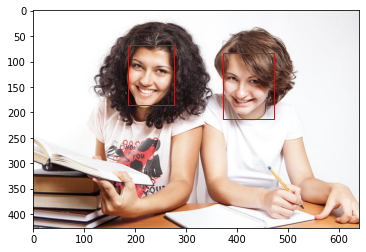

In [24]:
  filename = '/Users/omkarwazulkar/Main/Photos/.DSC_0395.jpg.icloud'
  pixels = pyplot.imread(filename)
  detector = MTCNN()
  faces = detector.detect_faces(pixels)
  draw_image_with_boxes(filename, faces)

In [25]:
from matplotlib.patches import Circle

In [27]:
# Image with Objects
def draw_image_with_boxes(filename, result_list):

  # Load Image
  data = pyplot.imread(filename)

  # Plot Image
  pyplot.imshow(data)

  # Plot Box
  ax = pyplot.gca()
  for result in result_list:
    x, y, width, height = result['box']
    rect = Rectangle((x, y), width, height, fill=False, color='red')
    ax.add_patch(rect)

    for key, value in result['keypoints'].items():
      dot = Circle(value, radius=2, color='red')
      ax.add_patch(dot)
  pyplot.show()

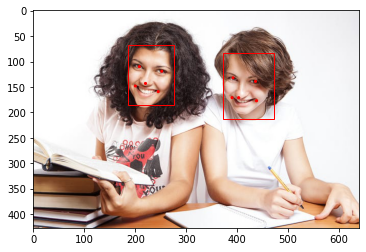

In [29]:
filename = '/content/drive/MyDrive/Dataset/Datasets/FaceDetection/students.jpeg'
pixels = pyplot.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixels)
draw_image_with_boxes(filename, faces)

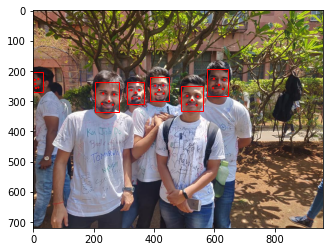

In [37]:
filename = '/content/Friends.jpeg'
pixels = pyplot.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixels)
draw_image_with_boxes(filename, faces)

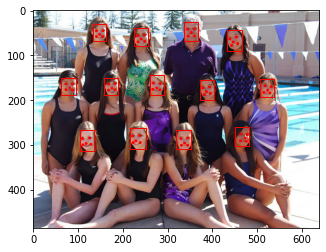

In [30]:
filename = '/content/drive/MyDrive/Dataset/Datasets/FaceDetection/swimmers.jpeg'
pixels = pyplot.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixels)
draw_image_with_boxes(filename, faces)

In [32]:
def draw_faces(filename, result_list):
  data = pyplot.imread(filename)
  for i in range(len(result_list)):
    x1, y1, width, height = result_list[i]['box']
    x2, y2 = x1 + width, y1 + height
    pyplot.subplot(1, len(result_list), i+1)
    pyplot.axis('off')
    # plot face
    pyplot.imshow(data[y1:y2, x1:x2])
    # show the plot
pyplot.show()

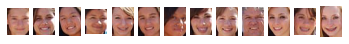

In [34]:
filename = '/content/drive/MyDrive/Dataset/Datasets/FaceDetection/swimmers.jpeg'
pixels = pyplot.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixels)
draw_faces(filename, faces)